<a href="https://colab.research.google.com/github/evanjenkins7/CS461/blob/main/Program3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [338]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GaussianNoise

In [339]:
#***************Uncomment to upload CSV file from computer*****************
#from google.colab import files 
#uploaded = files.upload()


In [340]:
#create dataset from CSV input
dataset = pd.read_csv(io.BytesIO(uploaded['StudentsPerformance.csv']))
dataset.head()
#one-hot code non-numerical values
dataset = pd.get_dummies(dataset, columns=['gender', 'race/ethnicity','parental level of education', 'lunch', 'test preparation course'])
dataset


,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


In [341]:
#separate dataset into 70/15/15 for Train/Test/Validation
train_dataset = dataset.sample(frac=0.7, random_state=42)
rest = dataset.drop(train_dataset.index)
test_dataset = rest.sample(frac=0.5, random_state=42)
validation_dataset = rest.drop(test_dataset.index)

In [342]:
#isolate input and output data into features and labels accordingly
train_features = train_dataset.copy()
test_features = test_dataset.copy()
validation_features = validation_dataset.copy()

math_score = train_features.pop('math score')
reading_score = train_features.pop('reading score')
writing_score = train_features.pop('writing score')
train_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = test_features.pop('math score')
reading_score = test_features.pop('reading score')
writing_score = test_features.pop('writing score')
test_labels = np.array([math_score, reading_score, writing_score]).transpose()

math_score = validation_features.pop('math score')
reading_score = validation_features.pop('reading score')
writing_score = validation_features.pop('writing score')
validation_labels = np.array([math_score, reading_score, writing_score]).transpose()

In [343]:
#generate normalizer layer
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [344]:
#get model function to create model
def get_model(normalizer):
    model = keras.Sequential(
    [
      normalizer,
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(3, activation="relu"),
    ])
    model.compile(loss='mae', optimizer=tf.optimizers.Adam())
    return model

In [345]:
#creation of model
model = get_model(normalizer)

#train model
history = model.fit(
    train_features,
    train_labels,
    validation_data=(validation_features, validation_labels),
    epochs=100,
    verbose=0)

history.history

{'loss': [66.49960327148438,
  64.45280456542969,
  59.98592758178711,
  51.48503494262695,
  36.34685516357422,
  20.760534286499023,
  14.400001525878906,
  12.769620895385742,
  12.387444496154785,
  12.640073776245117,
  12.018080711364746,
  12.11617374420166,
  11.916072845458984,
  11.801880836486816,
  12.299642562866211,
  12.059027671813965,
  11.688002586364746,
  11.583659172058105,
  11.678974151611328,
  11.500086784362793,
  11.624322891235352,
  11.602815628051758,
  11.441047668457031,
  11.575904846191406,
  11.487217903137207,
  11.048863410949707,
  11.53214168548584,
  11.051526069641113,
  11.37724494934082,
  11.547639846801758,
  10.948188781738281,
  11.141179084777832,
  11.324175834655762,
  11.0526762008667,
  11.306487083435059,
  10.869215965270996,
  11.040301322937012,
  11.167352676391602,
  10.83980655670166,
  10.87078857421875,
  10.598392486572266,
  10.888211250305176,
  10.880766868591309,
  10.5621337890625,
  10.843385696411133,
  10.93027591705

In [346]:
#evaluate mean average error and predictions
mae = model.evaluate(test_features, test_labels, verbose=0)

mae 


10.385025978088379

In [347]:
#create predictions
test_predictions = model.predict(test_features)

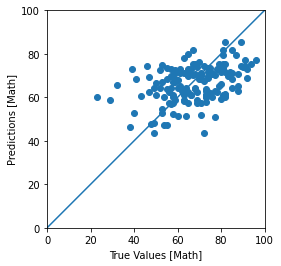

In [348]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[0], test_predictions.transpose()[0])
plt.xlabel('True Values [Math]')
plt.ylabel('Predictions [Math]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

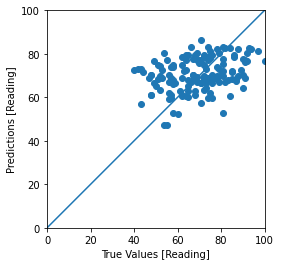

In [349]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[1], test_predictions.transpose()[1])
plt.xlabel('True Values [Reading]')
plt.ylabel('Predictions [Reading]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

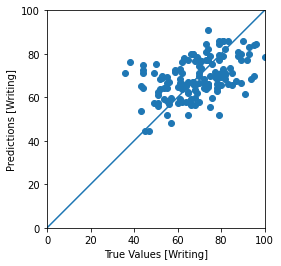

In [350]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels.transpose()[2], test_predictions.transpose()[2])
plt.xlabel('True Values [Writing]')
plt.ylabel('Predictions [Writing]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)